In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16,7)
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [6]:
data = pd.read_csv('startup_funding.csv')
data.shape

(3044, 10)

In [5]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [7]:
data.columns = ['Sno', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']

In [8]:
data.head()

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
data.head()

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [11]:
data.columns

Index(['Sno', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [16]:
print("The size of the data:",data.shape)

The size of the data: (3044, 10)


In [18]:
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
Sno,0,0.0


In [19]:
data['Remarks'].value_counts()

nan                                      2625
Series A                                  177
Series B                                   64
Pre-Series A                               37
Series C                                   28
                                         ... 
Incremental Capital                         1
Part of Series A raised in June 2015        1
Bridge Round Pre-Series B                   1
Super angel round                           1
Strategic Investment (Majority Stake)       1
Name: Remarks, Length: 70, dtype: int64

In [20]:
data = data.drop(['Remarks'], axis = 1)

data.columns

Index(['Sno', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [22]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

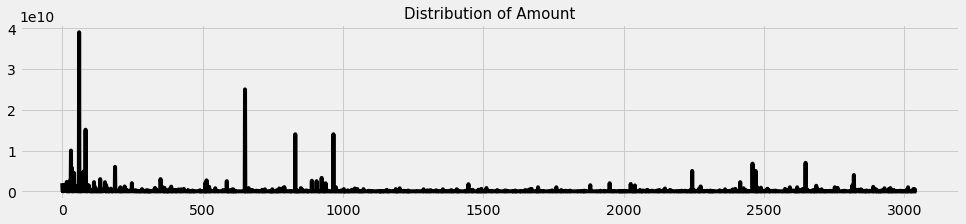

In [23]:
# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [24]:

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [25]:
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


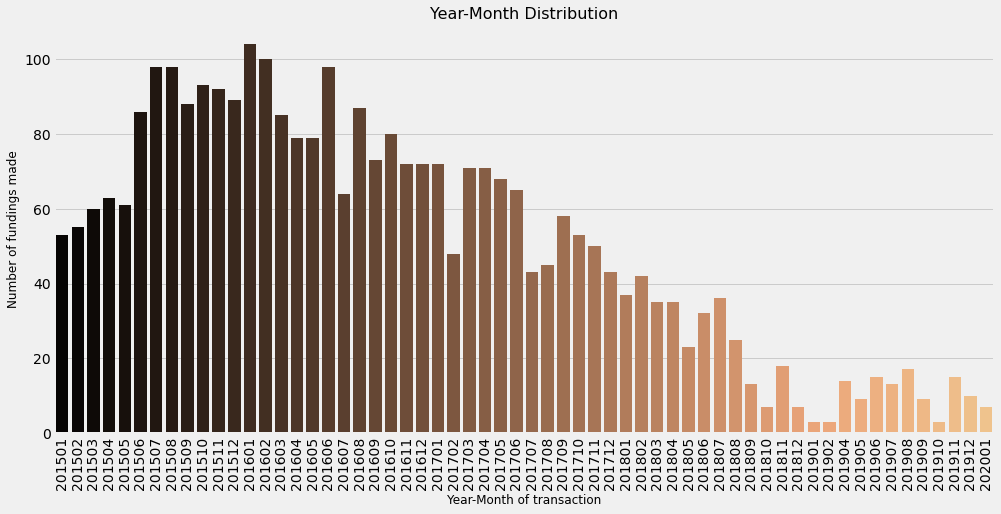

In [26]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [27]:
print("Maximum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  39000000000.0


In [28]:
@interact

def check(column = 'AmountInUSD', x = 500000000):
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [29]:
data[data.StartupName == 'Paytm']

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+10,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+07,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+10,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+08,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+09,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,9.990000e+03,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,9.990000e+03,201502


In [30]:
data[data.StartupName == 'Flipkart']

,Sno,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+10,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+08,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+10,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+08,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+08,201506


In [31]:
print('Minimum amount funding for a startup is: ', data['AmountInUSD'].dropna().sort_values().min())

Minimum amount funding for a startup is:  9990.0


In [32]:
data[['AmountInUSD', 'StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head()

,AmountInUSD,StartupName
2125,9990.0,Splitkart
1464,9990.0,TAC Security
708,9990.0,FableStreet
709,9990.0,Monsoon Fintech
710,9990.0,MonkeyBox


In [35]:
data[data['AmountInUSD'] == 9990.0].shape

(971, 10)

In [37]:
print('Average amount funding for a startup is: ', data['AmountInUSD'].dropna().sort_values().mean())

Average amount funding for a startup is:  132706955.99540079


In [38]:
print('Total Startup Funded: ', len(data['StartupName'].unique()))

Total Startup Funded:  2457


In [41]:
print(data['StartupName'].value_counts().head(10))

Swiggy       8
Ola Cabs     8
Paytm        7
Medinfi      6
Meesho       6
UrbanClap    6
NoBroker     6
Nykaa        6
Jugnoo       5
Grofers      5
Name: StartupName, dtype: int64


In [52]:
startupname = data['StartupName'].value_counts().head(20)

startupname.head(20)

Swiggy           8
Ola Cabs         8
Paytm            7
Medinfi          6
Meesho           6
UrbanClap        6
NoBroker         6
Nykaa            6
Jugnoo           5
Grofers          5
Capital Float    5
Moglix           5
Toppr            5
Flipkart         5
Uniphore         5
Icertis          4
Zomato           4
Magicpin         4
Zoctr            4
Vyomo            4
Name: StartupName, dtype: int64

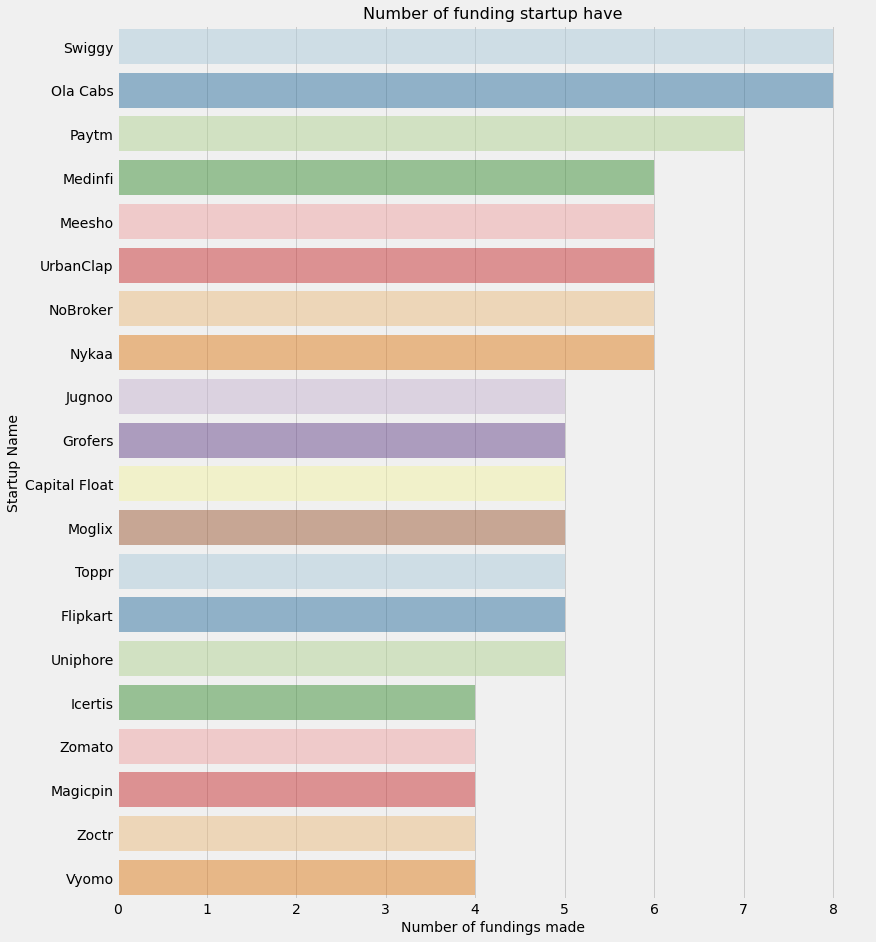

In [59]:
plt.rcParams['figure.figsize'] = (12,15)
sns.barplot(y = startupname.index, x= startupname.values, alpha= 0.5, palette= 'Paired')
plt.xticks(rotation= 'horizontal')
plt.xlabel('Number of fundings made', fontsize = 14)
plt.ylabel('Startup Name', fontsize = 14)
plt.title('Number of funding startup have', fontsize = 16)
plt.show()

In [60]:
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

In [68]:
industry = data['IndustryVertical'].value_counts().head(10)

industry.head()

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Name: IndustryVertical, dtype: int64

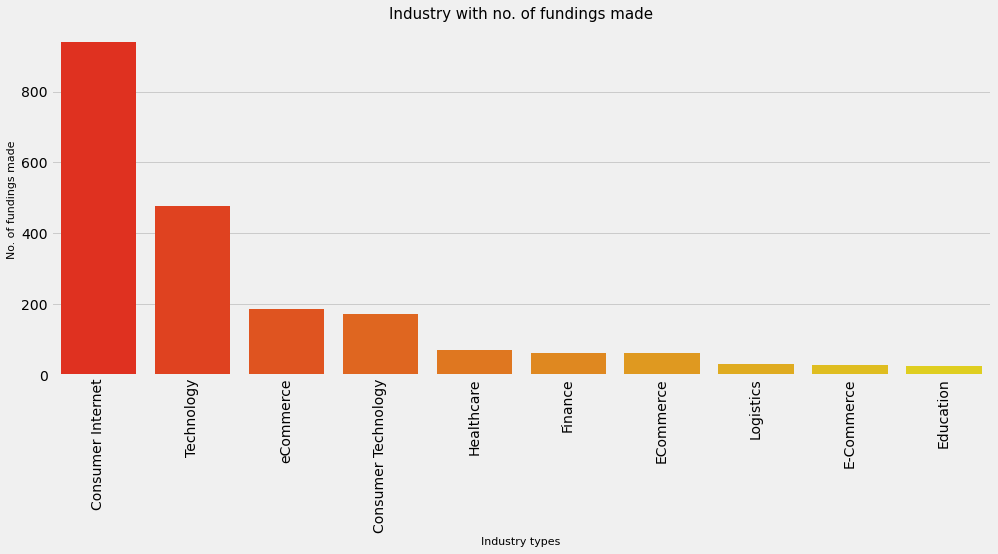

In [72]:
plt.rcParams['figure.figsize'] = (15,6)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation= 'vertical')
plt.xlabel('Industry types', fontsize = 11)
plt.ylabel('No. of fundings made', fontsize= 11)
plt.title('Industry with no. of fundings made', fontsize= 15)
plt.show()

In [82]:
subindustry = data['SubVertical'].value_counts()[1:].head(20)

subindustry

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online Learning Platform          5
Education                         5
Online Lending                    5
Online lending platform           5
Online Education Platform         5
Online Food Delivery              4
Non-Banking Financial Company     4
Online learning platform          3
Online Payment Gateway            3
Online Furniture Store            3
ECommerce Marketplace             3
Fitness Mobile App                3
Online Insurance Platform         3
Agri-tech                         3
SaaS                              3
Online Gifting platform           3
Online Marketplace                3
Name: SubVertical, dtype: int64

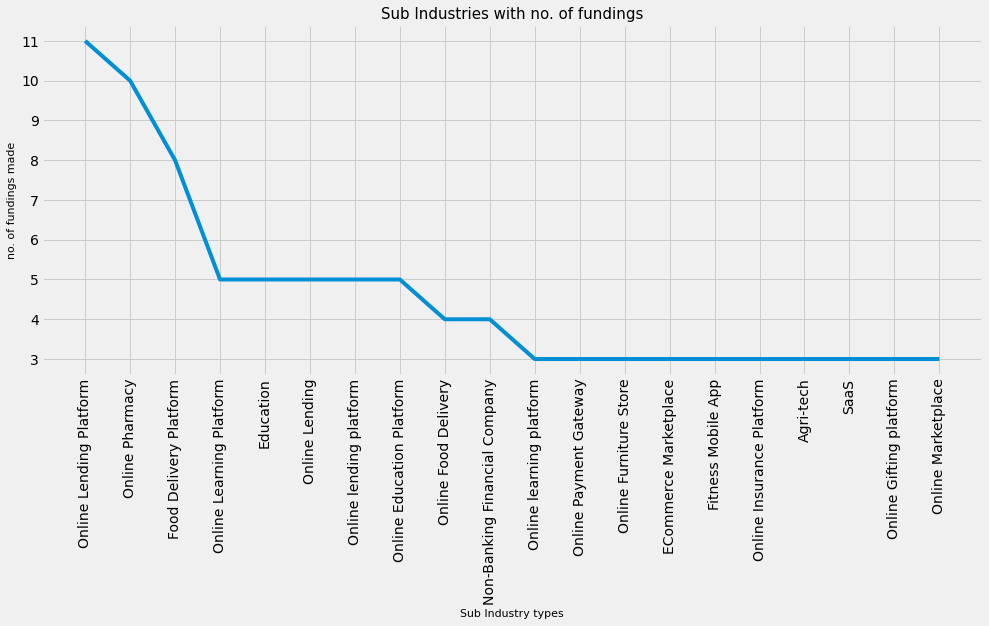

In [87]:
sns.lineplot(subindustry.index, subindustry.values, palette='winter')
plt.xticks(rotation= 'vertical')
plt.xlabel('Sub Industry types', fontsize= 11)
plt.ylabel('no. of fundings made', fontsize= 11)
plt.title('Sub Industries with no. of fundings', fontsize= 15)
plt.show()

In [91]:
data['City'] = data['City'].replace(('Bengaluru', 'nan'), ('Bangalore', 'Bangalore'))

data['City'].head()

0    Bangalore
1      Gurgaon
2    Bangalore
3    New Delhi
4       Mumbai
Name: City, dtype: object

In [96]:
city = data['City'].value_counts().head(10)

city

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64

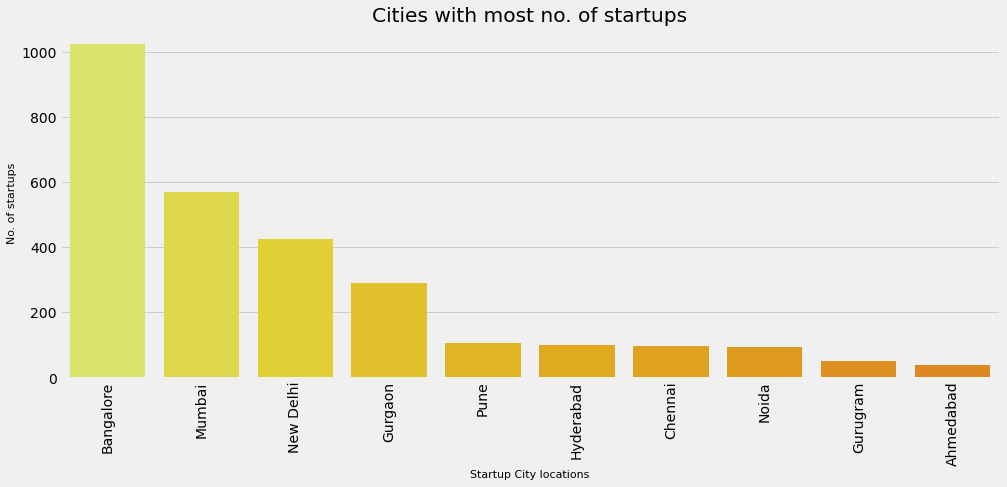

In [97]:
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation= 'vertical')
plt.xlabel('Startup City locations', fontsize= 11)
plt.ylabel('No. of startups', fontsize= 11)
plt.title('Cities with most no. of startups')
plt.show()

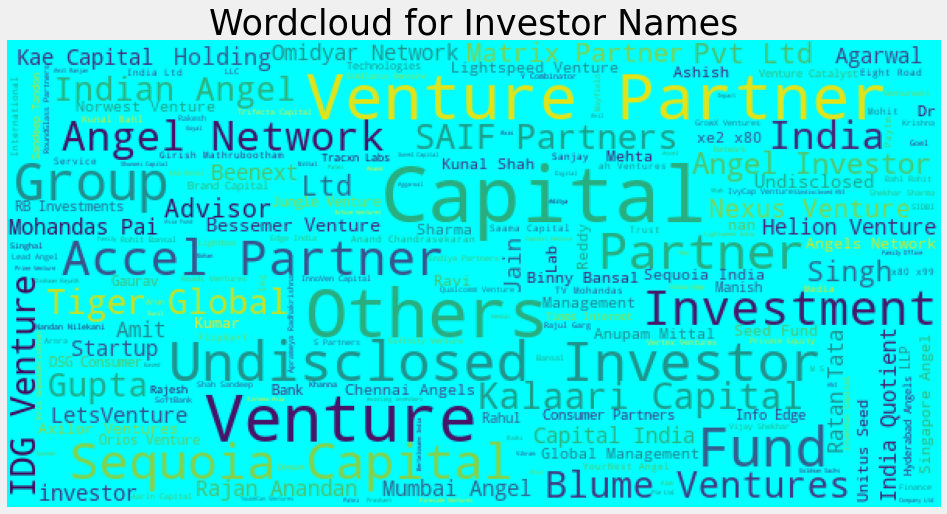

In [99]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [100]:
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

investors = data['InvestorsName'].value_counts().head(10)
investors

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64

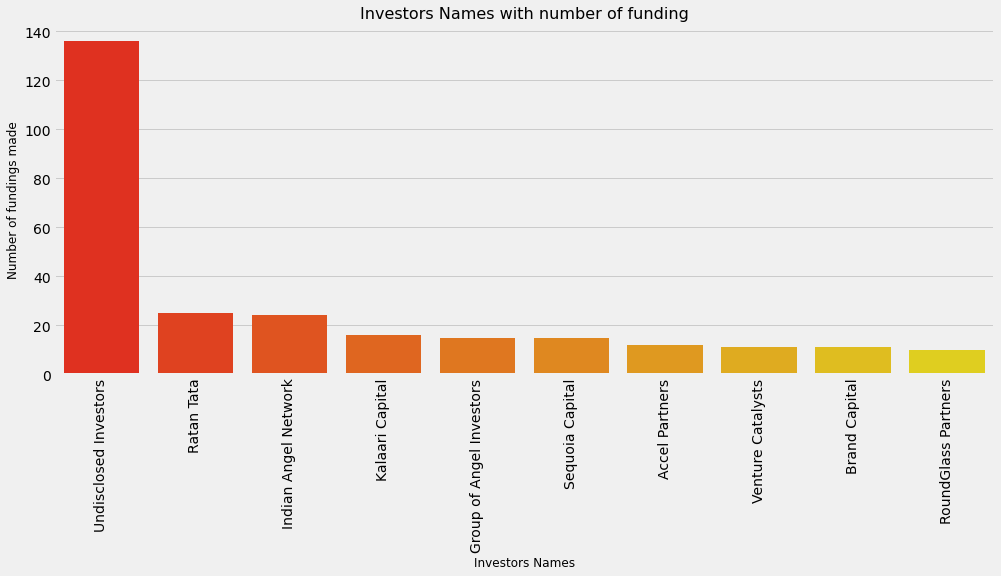

In [103]:
sns.barplot(investors.index, investors.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


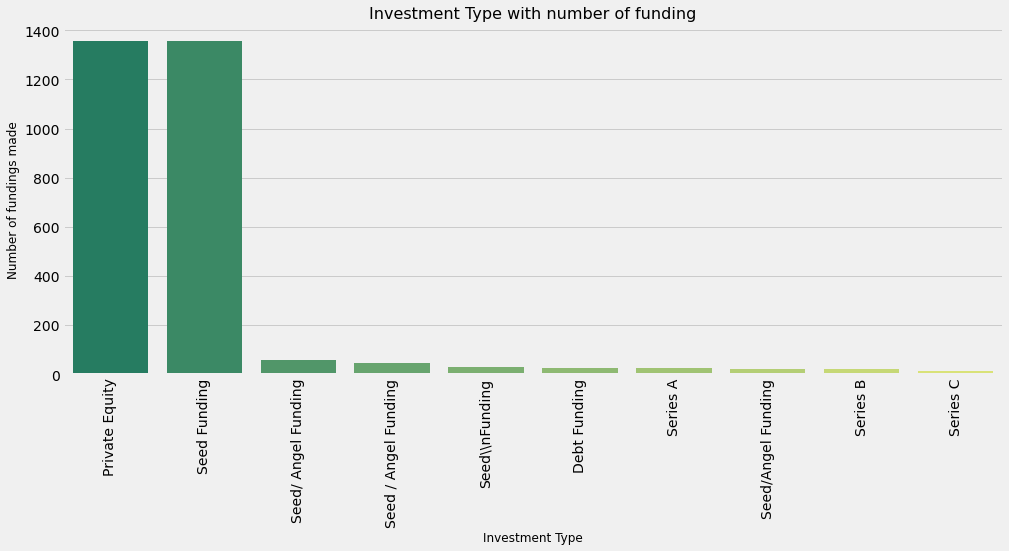

In [104]:
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()